In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,customer_id,birth_year,education_level,marital_status,annual_income,num_children,num_teenagers,signup_date,days_since_last_purchase,has_recent_complaint,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign
0,5524,1957,Graduation,Single,58138.0,0,0.0,4/9/2012,58,0,...,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1.0,8/3/2014,38,0,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0.0,21-08-2013,26,0,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0.0,10/2/2014,26,0,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0.0,19-01-2014,94,0,...,5,3,6,5,0,0,0,0,0,0


In [4]:
df.isnull().sum()


customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income               67
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

In [5]:
df =df.dropna()  

In [6]:
df.isnull().sum()

customer_id                 0
birth_year                  0
education_level             0
marital_status              0
annual_income               0
num_children                0
num_teenagers               0
signup_date                 0
days_since_last_purchase    0
has_recent_complaint        0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets                0
spend_gold                  0
num_discount_purchases      0
num_web_purchases           0
num_catalog_purchases       0
num_store_purchases         0
web_visits_last_month       0
accepted_campaign_1         0
accepted_campaign_2         0
accepted_campaign_3         0
accepted_campaign_4         0
accepted_campaign_5         0
accepted_last_campaign      0
dtype: int64

In [9]:
outlier_counts = {}


for col in df.select_dtypes(include=["number"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_counts[col] = outliers.count()

outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_summary)

                          Outlier Count
customer_id                           0
birth_year                            3
annual_income                         8
num_children                          0
num_teenagers                         0
days_since_last_purchase              0
has_recent_complaint                 21
spend_wine                           35
spend_fruits                        227
spend_meat                          175
spend_fish                          223
spend_sweets                        248
spend_gold                          207
num_discount_purchases               86
num_web_purchases                     4
num_catalog_purchases                23
num_store_purchases                   0
web_visits_last_month                 8
accepted_campaign_1                 144
accepted_campaign_2                  30
accepted_campaign_3                 163
accepted_campaign_4                 167
accepted_campaign_5                 163
accepted_last_campaign              334


In [15]:
print(df["accepted_campaign_1"].value_counts())
print(df["accepted_campaign_2"].value_counts())
print(df["accepted_campaign_3"].value_counts())
print(df["accepted_campaign_4"].value_counts())
print(df["accepted_campaign_5"].value_counts())


accepted_campaign_1
0    2096
1     144
Name: count, dtype: int64
accepted_campaign_2
0    2210
1      30
Name: count, dtype: int64
accepted_campaign_3
0    2077
1     163
Name: count, dtype: int64
accepted_campaign_4
0    2073
1     167
Name: count, dtype: int64
accepted_campaign_5
0    2077
1     163
Name: count, dtype: int64


# Dont clip outliers for these

# As we can see we have some outliers we need to remove as if we're gonna segment using kmeans it will be affected as it's a mean based algorithm which if we remember mean is sensetive to outliers  ofc this differs with dbscan which turns that into noise 


# As we dont have much data we will clip instead of removing


In [ ]:
df_clean = df.copy()

for col in df.select_dtypes(include=["number"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower_bound, upper_bound)


In [ ]:
outlier_counts = {}

for col in df.select_dtypes(include=["number"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_counts[col] = outliers.count()

outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_summary)


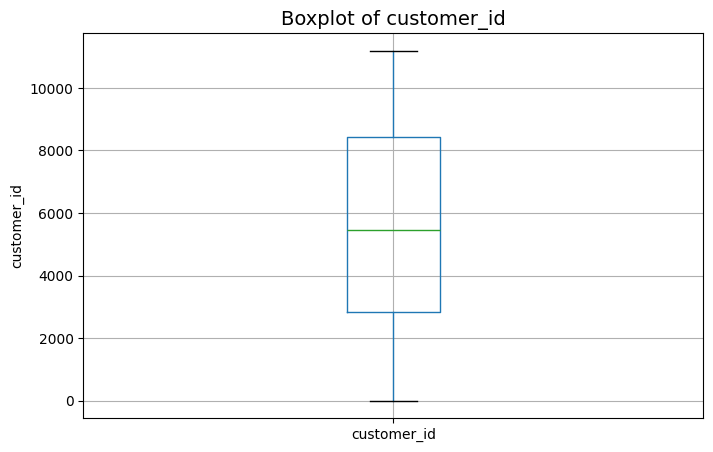

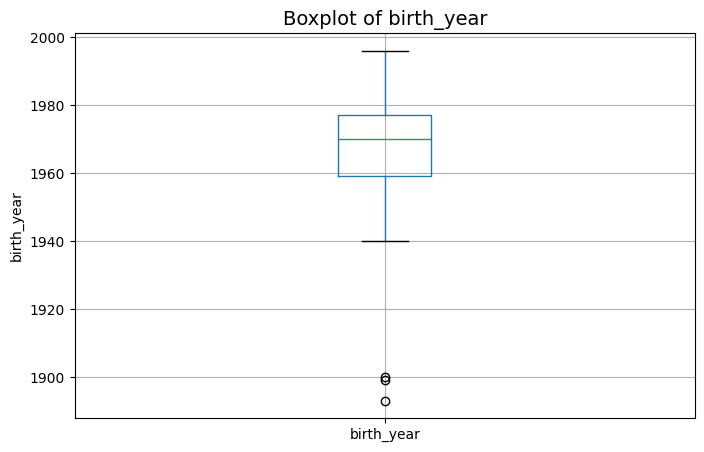

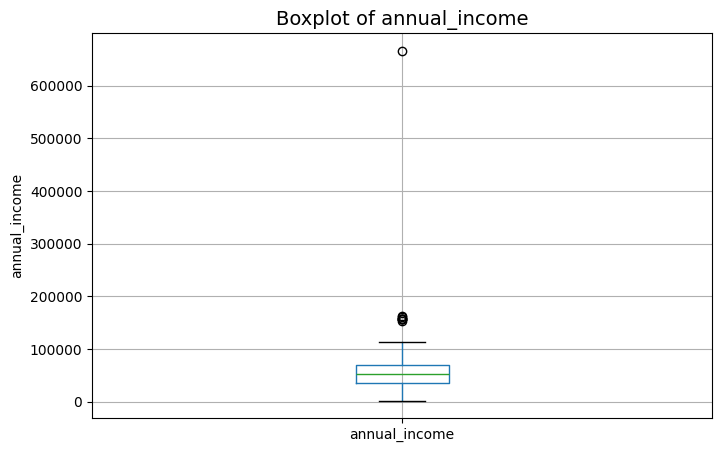

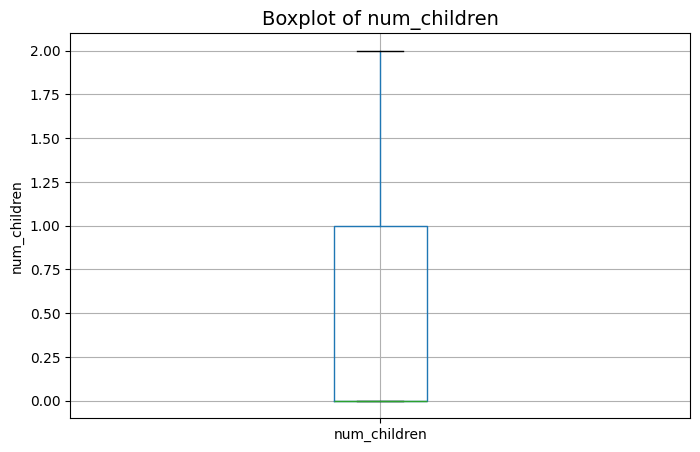

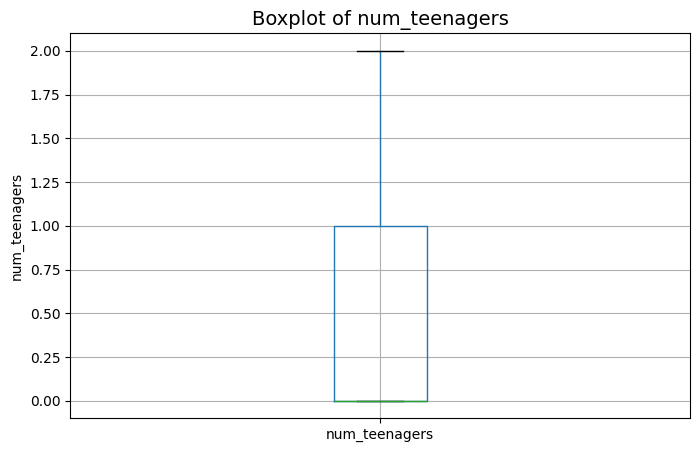

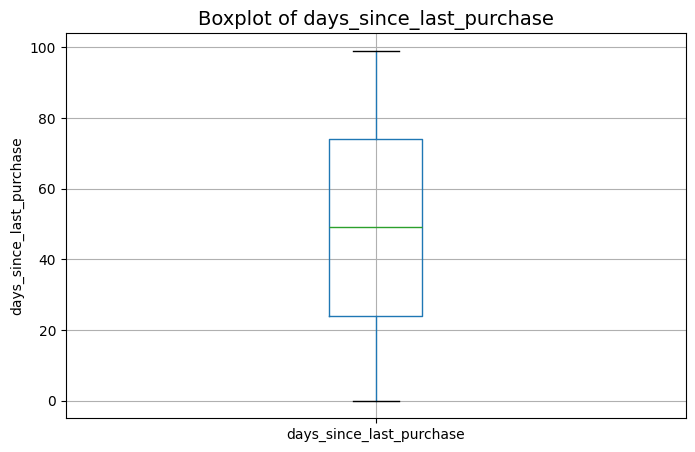

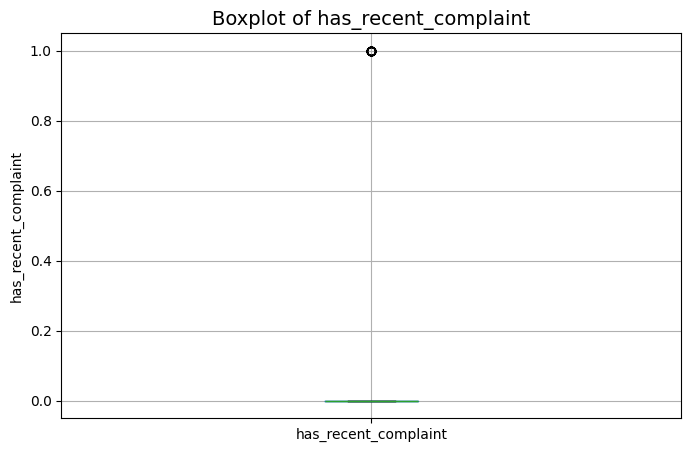

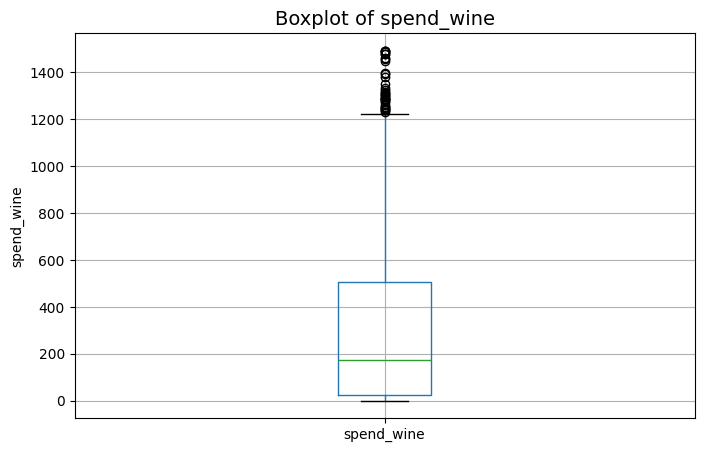

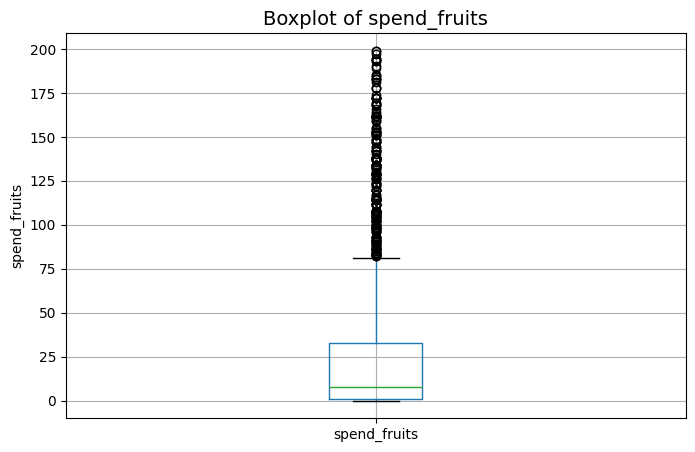

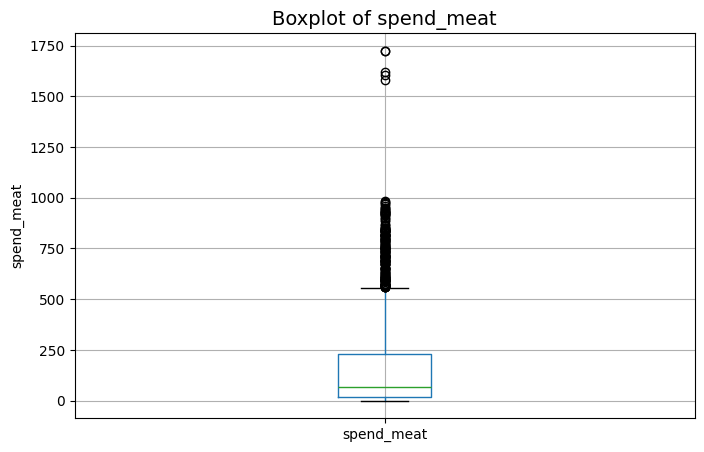

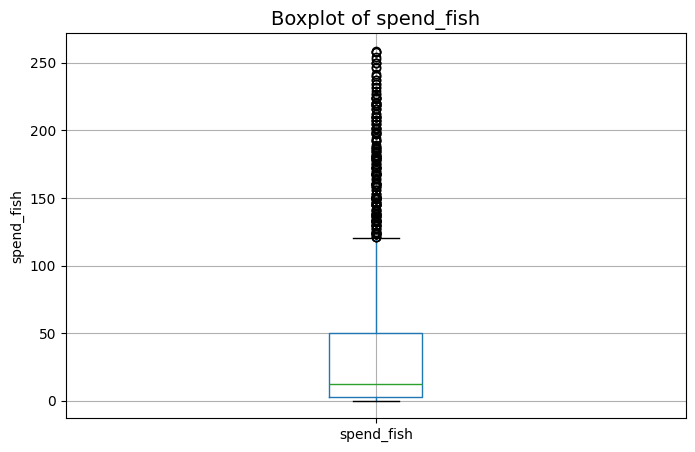

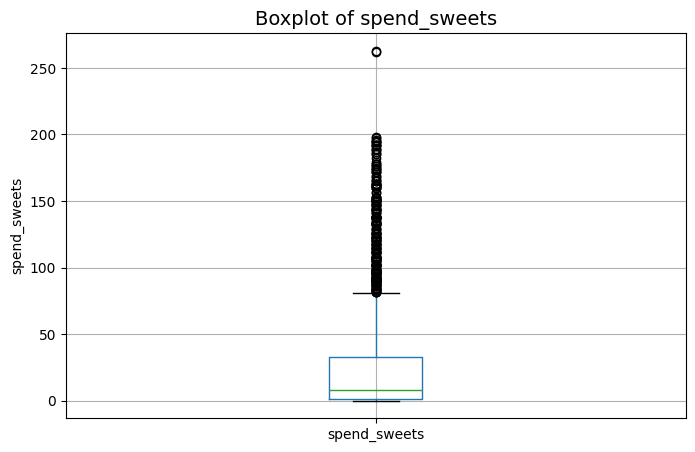

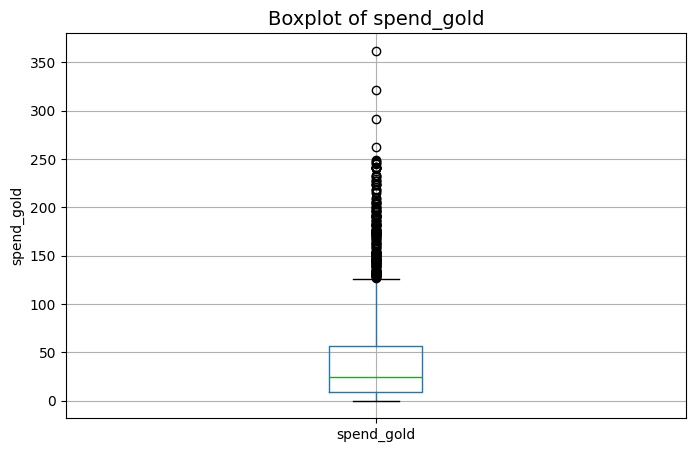

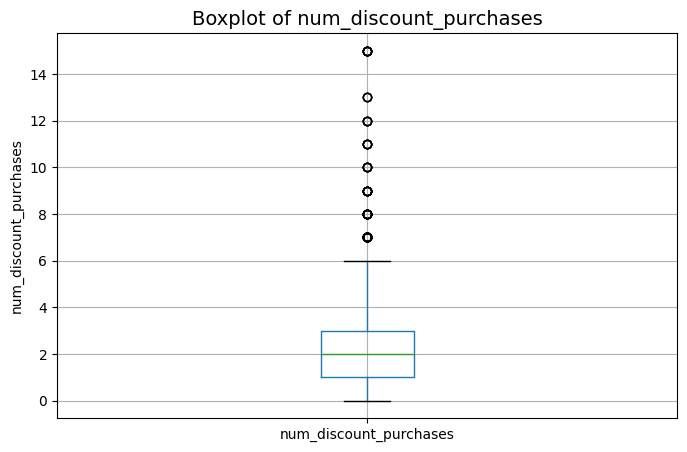

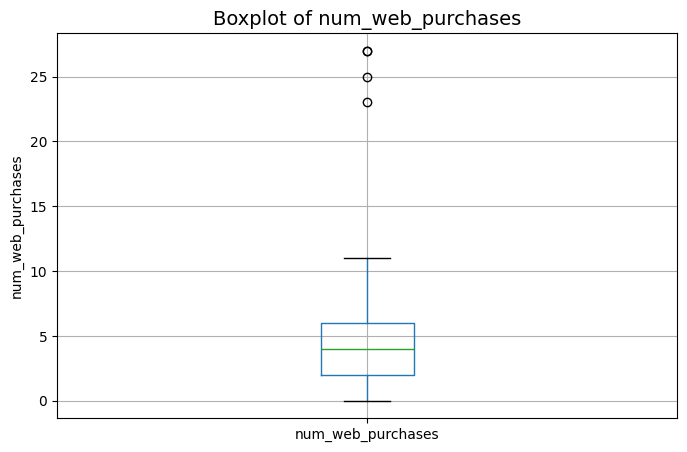

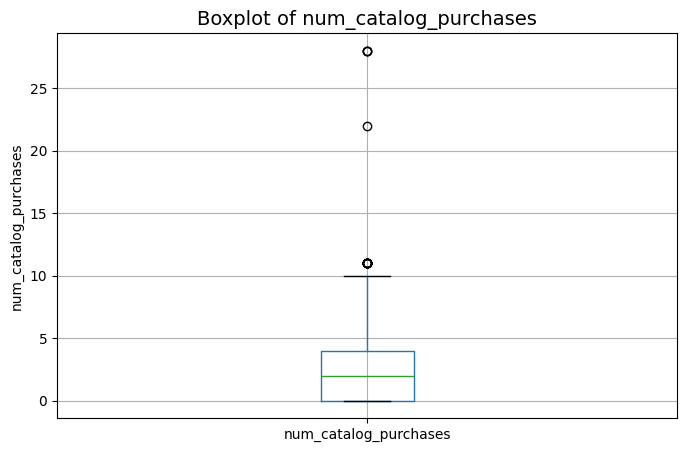

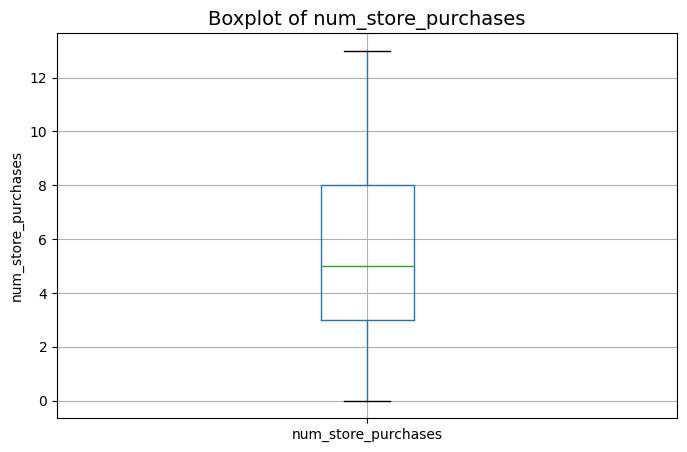

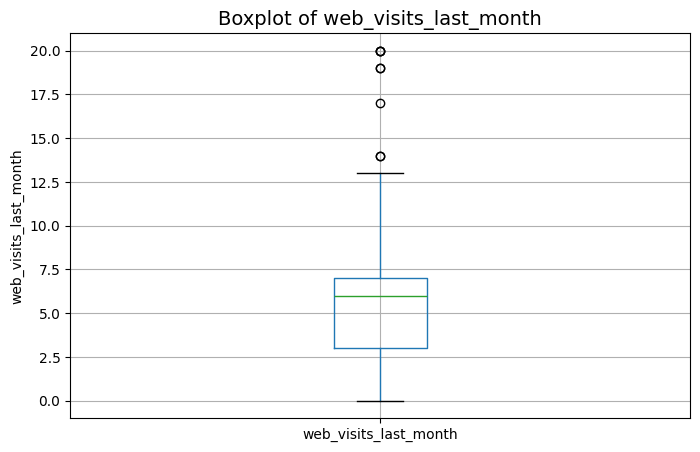

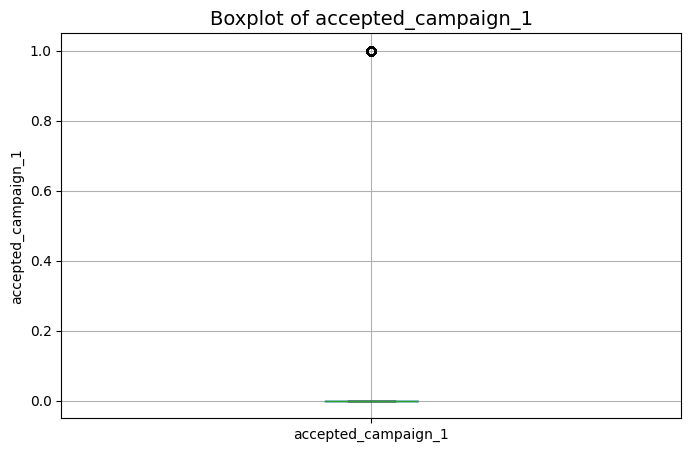

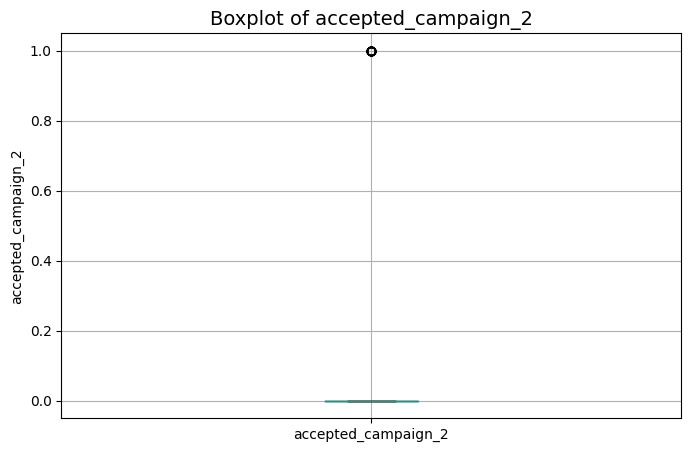

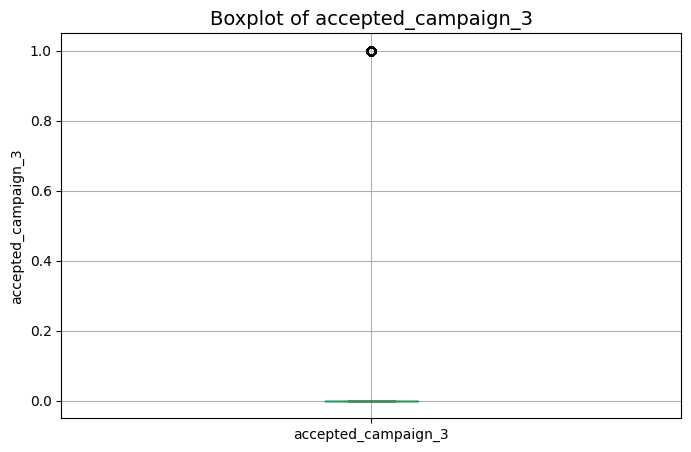

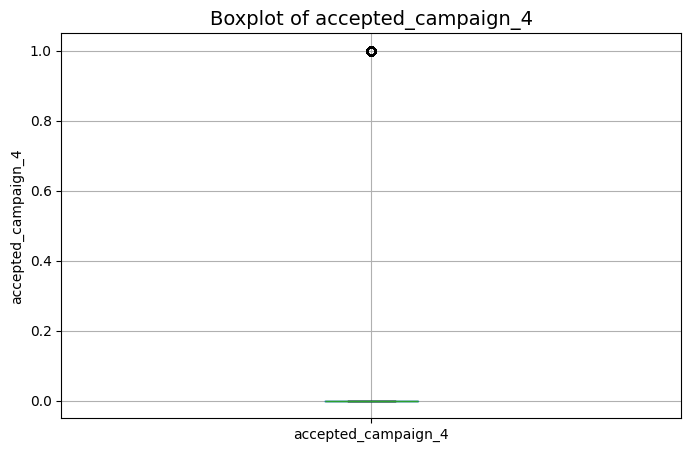

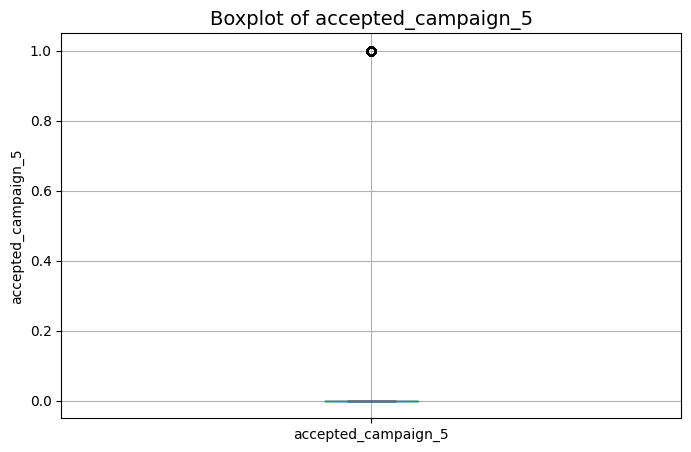

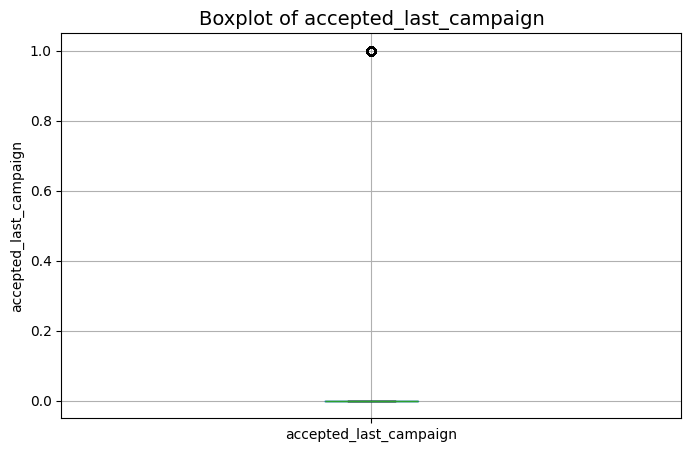